# S&P500 Exploratory research

Let's see what is in our dataset and how we should clean it.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('../../data/raw/sp500.csv', parse_dates=['Date'])
df = df.set_index('Date')
df = df[(df.index >= '2000-01-01') & (df.index < '2023-01-01')]
df

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
2000-01-01,1425.59,16.71,49.10,168.80,6.66,2109.97,24.74,72.67,43.77
2000-02-01,1388.87,16.74,50.02,169.80,6.52,2043.52,24.63,73.60,42.19
2000-03-01,1442.21,16.76,50.95,171.20,6.26,2104.65,24.46,74.35,43.22
2000-04-01,1461.36,16.74,51.27,171.30,5.99,2131.35,24.41,74.78,43.53
2000-05-01,1418.48,16.72,51.60,171.50,6.44,2066.39,24.36,75.16,41.97
...,...,...,...,...,...,...,...,...,...
2017-12-01,2664.34,48.93,109.88,246.52,2.40,2700.13,49.59,111.36,32.09
2018-01-01,2789.80,49.29,NaN,247.87,2.58,2811.96,49.68,NaN,33.31
2018-02-01,2705.16,49.64,NaN,248.99,2.86,2714.34,49.81,NaN,32.12


We have some NaN's in there, its monthly data, let's see how bad our NaN problem is

In [32]:
df.isnull().astype(int).sum() / len(df.index)

SP500                   0.000000
Dividend                0.004545
Earnings                0.018182
Consumer Price Index    0.000000
Long Interest Rate      0.000000
Real Price              0.000000
Real Dividend           0.004545
Real Earnings           0.018182
PE10                    0.000000
dtype: float64

Nothing major, let's get some plots going to get a feel for the data

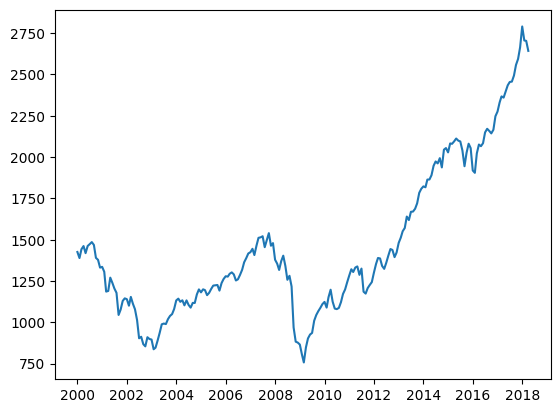

In [33]:
plt.plot(df.index, df['SP500'])

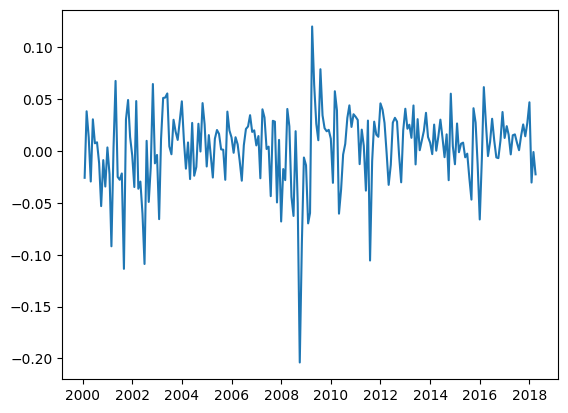

In [34]:
plt.plot(df.index, df['SP500'].pct_change())

Looks like your normal S&P500 data, let's see if there is some correlation in the rest of our data

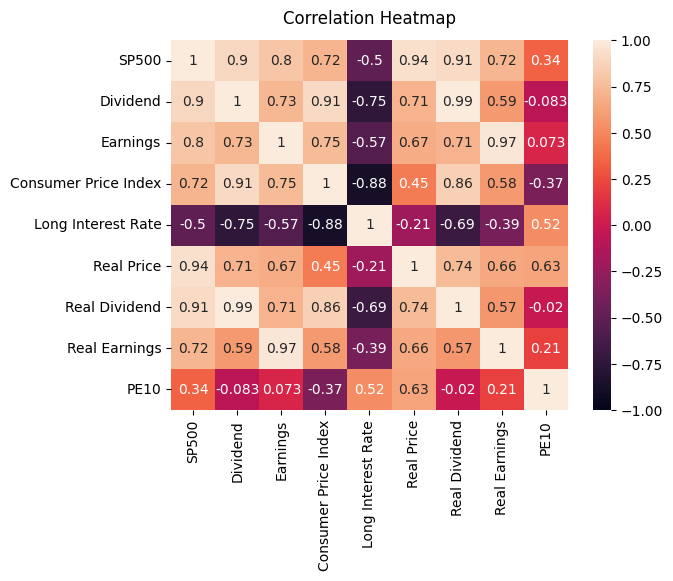

In [40]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The data looks quite correlated, which is promising for predictability!